## Load the an image

 - Call a library to upload an image

In [81]:
from PIL import Image
import numpy as np

In [82]:
path_image = "images/leon.jpeg"

In [83]:
image = Image.open(path_image) 
image = image.convert("RGB")

In [84]:
IMG = np.array(image)

 - Testing Show

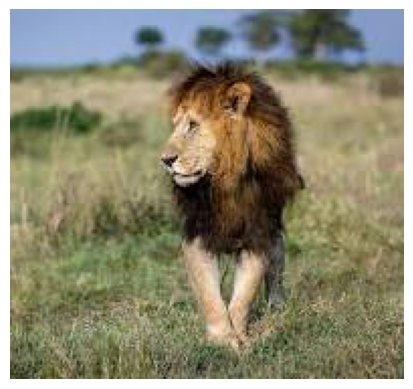

In [85]:
import matplotlib.pyplot as plt

plt.imshow(IMG)
plt.axis("off") 
plt.show()

## Determine the pixel resolution of IMG

In [86]:
print(f'Final Image Width: {len(IMG[0])}, Height: {len(IMG)}')

Final Image Width: 195, Height: 183


## Show the RGB values of the pixel IMG(10, 15)

In [87]:
print(f'RGB values of the pixel IMG(10, 15) is  {IMG[10][15]}')

RGB values of the pixel IMG(10, 15) is  [146 169 210]


## Calculate the brightness of IMG

In [88]:
def calculate_brightness(IMG ,img_height , img_width  ):
    R_values = []
    G_values = []
    B_values = []
    brightness_values = [] 
    for i in range(0 , img_height) : 
        for j in range(0 , img_width) : 
            R_values.append(IMG[i][j][0])
            G_values.append(IMG[i][j][1])
            B_values.append(IMG[i][j][2])
            brightness = (0.29 * IMG[i][j][0] + 0.58 * IMG[i][j][1] + 0.11 * IMG[i][j][2])
            brightness_values.append(brightness)
            
    average_brightness = sum(brightness_values) / len(brightness_values)
    
    return  average_brightness , brightness_values

In [89]:
average_brightness ,brightness_values = calculate_brightness(IMG,len(IMG),len(IMG[0]))

print(f'Average Brightness: {average_brightness}')
print(f' Brightness values : {brightness_values[:8]}')

Average Brightness: 122.06734846574136
 Brightness values : [156.6, 156.6, 156.6, 156.6, 157.57999999999998, 157.57999999999998, 158.56, 158.56]


## Calculate the contrast of IMG

In [90]:
import math 

def calculate_contrast(average_brightness , brightness_values , N , M) : 
    
    contrast_sum = 0
    for brightness in brightness_values:
        
        contrast_sum += (brightness - average_brightness) ** 2
        
    contrast  =  math.sqrt(contrast_sum / (M * N))
    
    return contrast
    

In [91]:
print(f'Contrast: {calculate_contrast(average_brightness , brightness_values ,len(IMG[0]),len(IMG) )}')

Contrast: 39.76653957879399


## Show the each of the RGB channels separately

In [92]:
def rgb_matrix(IMG , img_height , img_width  ) : 
    
    R_matrix = []
    G_matrix = []
    B_matrix = []
    
    for i in range(0 , img_height) :
        R_row = []
        G_row = []
        B_row = []
        for j in range(0 , img_width) :
            R_row.append(IMG[i][j][0])
            G_row.append(IMG[i][j][1])
            B_row.append(IMG[i][j][2])
        
        R_matrix.append(R_row)
        G_matrix.append(G_row)
        B_matrix.append(B_row)
    
    return R_matrix , G_matrix , B_matrix

In [93]:
R_matrix , G_matrix , B_matrix = rgb_matrix(IMG , len(IMG) , len(IMG[0])  )

 - Testin Show image in channel Blue

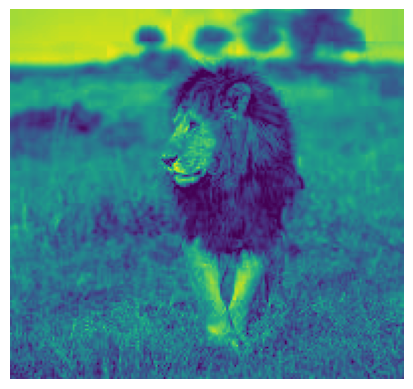

In [94]:
plt.imshow(B_matrix)
plt.axis("off") 
plt.show()

## Convert IMG to gray-level using the average method

In [110]:
def gray_level(IMG , img_height , img_width  ) :
    
    Gray_matrix = []
    for i in range(0 , img_height) :
        Gray_row = []
        for j in range(img_width):
            R = IMG[i][j][0]
            G = IMG[i][j][1]
            B = IMG[i][j][2]
            Gray = (R + G + B) / 3
            Gray_row.append(Gray)
        Gray_matrix.append(Gray_row)
    return np.array(Gray_matrix)

In [111]:
Gray_matrix = gray_level(IMG , len(IMG) , len(IMG[0])  )

C:\Users\USER\AppData\Local\Temp\ipykernel_5160\3749244039.py:10: RuntimeWarning: overflow encountered in scalar add
  Gray = (R + G + B) / 3


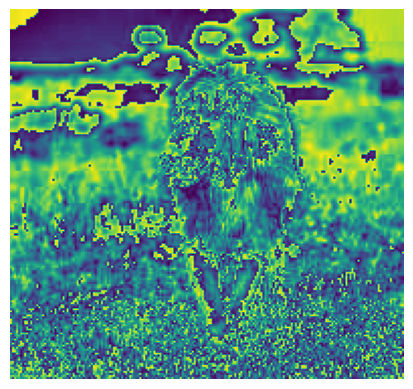

In [112]:
plt.imshow(Gray_matrix)
plt.axis("off") 
plt.show()

## Convert IMG to gray-level using the weighted formula

In [101]:
def gray_level_two(IMG , img_height , img_width  ) :
    
    Gray_matrix = []
    for i in range(0 , img_height) :
        Gray_row = []
        for j in range(img_width):
            R = IMG[i][j][0]
            G = IMG[i][j][1]
            B = IMG[i][j][2]
            Gray = (R * 0.29) +( G * 0.6) + (B * 0.11)
            Gray_row.append(Gray)
        Gray_matrix.append(Gray_row)
    return Gray_matrix

In [102]:
IMG_2 = gray_level_two(IMG , len(IMG) , len(IMG[0])   )

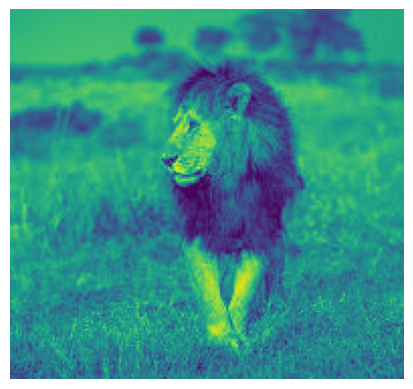

In [103]:
plt.imshow(IMG_2)
plt.axis("off") 
plt.show()

## Determine the min / max value of IMG and IMG2

In [104]:
def min_max(img):
    min_val = IMG[0][0][0]
    max_val = IMG[0][0][0]
    
    for row in IMG:
        for pixel in row:
            for channel in pixel:  
                if channel < min_val:
                    min_val = channel
                if channel > max_val:
                    max_val = channel
    
    return min_val, max_val

In [105]:
print("IMG min / max:", min_max(IMG))
print("IMG2 min / max:", min_max(IMG_2))

IMG min / max: (0, 255)
IMG2 min / max: (0, 255)


## Calculate the pixel resolution of IMG and IMG2 in terms of MegaPixel 

In [106]:
def mega_pixel(img_height, img_width):
    total_pixels = img_height * img_width
    megapixels = total_pixels / 1_000_000  
    return megapixels

In [107]:
print("IMG resolution in MP:", mega_pixel(len(IMG) , len(IMG[0])) )
print("IMG2 resolution in MP:", mega_pixel(len(IMG_2) , len(IMG_2[0])) )

IMG resolution in MP: 0.035685
IMG2 resolution in MP: 0.035685


## Calculate the size of IMG

In [108]:
def image_size(img_height, img_width, channels, bit_depth=8):
    size_in_bytes = img_height * img_width * channels * (bit_depth // 8)
    return size_in_bytes

In [109]:
print("IMG size in bytes:", image_size(len(IMG) , len(IMG[0]), 3))

IMG size in bytes: 107055


## SUB_IMG the sub-image from IMG  line 50 to 70 & column 20 to 90. Display the two images

In [114]:
SUB_IMG = IMG[50: 70, 20:90]

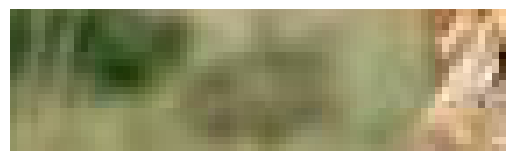

In [115]:
plt.imshow(SUB_IMG)
plt.axis("off") 
plt.show()